In [1]:
import pandas as pd 
import numpy as np 
import nltk
from nltk.corpus import stopwords
import seaborn as sns

In [2]:
data = pd.read_csv("flipkart_data.csv")
data.head()

,review,rating
0,It was nice produt. I like it's design a lot. ...,5
1,awesome sound....very pretty to see this nd th...,5
2,awesome sound quality. pros 7-8 hrs of battery...,4
3,I think it is such a good product not only as ...,5
4,awesome bass sound quality very good bettary l...,5


In [3]:
data.shape

(9976, 2)

<Axes: xlabel='rating', ylabel='count'>

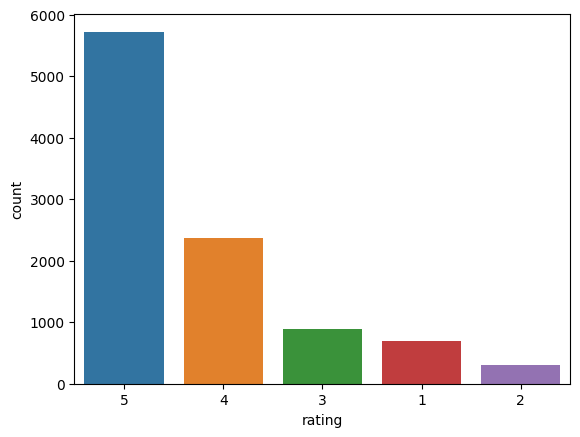

In [4]:
sns.countplot(data,x="rating",order=data.rating.value_counts().index)

In [5]:
# if the rating is less than equal to 4 it is negative(0), else positive(1)
pos_neg = []
for i in range(len(data["rating"])):
    if data["rating"][i]>=5:
        pos_neg.append(1)
    else:
        pos_neg.append(0)

pos_neg

[1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,


In [6]:
data['label'] = pos_neg
data.head()

,review,rating,label
0,It was nice produt. I like it's design a lot. ...,5,1
1,awesome sound....very pretty to see this nd th...,5,1
2,awesome sound quality. pros 7-8 hrs of battery...,4,0
3,I think it is such a good product not only as ...,5,1
4,awesome bass sound quality very good bettary l...,5,1


Preprocessing the data

In [7]:
from nltk.tokenize import RegexpTokenizer
def preprocess(data_text):
    processed_text = []
    stop_words = set(stopwords.words('english'))
    for i in data_text:
        # removing punctuation
        tokenizer = RegexpTokenizer(r'\w+')
        clean_text = tokenizer.tokenize(i)
        # removing stopwords
        filtered_sentence = [w.lower() for w in clean_text if not w.lower() in stop_words]
        processed_text.append(' '.join(filtered_sentence))
    
    return processed_text

Testing the function with small sample input

In [8]:
sample = preprocess(data['review'][0:5])
sample

['nice produt like design lot easy carry looked stylish read',
 'awesome sound pretty see nd sound quality good wish take product loved product read',
 'awesome sound quality pros 7 8 hrs battery life including 45 mins approx call time awesome sound output bass treble really clear without equaliser equaliser sound wary depends handset sound quality weightless carry head toomic good traffic good 3 25 5 3 5mm option really important mention really expecting leading brands implement consvery tight ears adjusters ok tight read',
 'think good product per quality also design quite good using product january pandamic situation became useful helpful overall bass sound quality pretty good another thing give sigh relief provide wire help case lacking charges read',
 'awesome bass sound quality good bettary long life purchase rs 999 really grateful product forget likeread']

In [9]:
processed_reviews = preprocess(data['review'])
data['review'] = processed_reviews
data.head()

,review,rating,label
0,nice produt like design lot easy carry looked ...,5,1
1,awesome sound pretty see nd sound quality good...,5,1
2,awesome sound quality pros 7 8 hrs battery lif...,4,0
3,think good product per quality also design qui...,5,1
4,awesome bass sound quality good bettary long l...,5,1


In [10]:
data['label'].value_counts()

label
1    5726
0    4250
Name: count, dtype: int64

Machine Learning Model

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer 

In [15]:

cv = TfidfVectorizer(max_features=2500) 
X = cv.fit_transform(data['review'] ).toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [17]:
x_train, x_test, y_train, y_test = train_test_split(X,data['label'],
                                                    test_size=0.33,
                                                    stratify=data['label'])

In [19]:
model = DecisionTreeClassifier()
model.fit(x_train,y_train)


DecisionTreeClassifier()

In [20]:
pred = model.predict(x_test)
pred

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score